# `snow_partitioning`
This filter applies the ``snow`` algorithm to produce a watershed segmentation using the rules outlined in our paper in [Physical Review E](https://doi.org/10.1103/PhysRevE.96.023307).  Namely, apply a gaussian blur before finding peaks, removing peaks that lie on saddle points, and removing peaks that are closer to another peak than to solid.  The output of this function can be passed to ``porespy.network.regions_to_networks`` to obain an extracted network for use in OpenPNM. Note that ``ps.networks.snow2`` combines all these steps into a single function, returning all the itermediate images as well as the network.  Note that the ``2`` indicates a modified version from the one presented in ``PRE``.  The new version is less aggressive when trimming saddle points, so results in a higher number of pores.

In [1]:
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
import inspect
inspect.signature(ps.filters.snow_partitioning)

<Signature (im, dt=None, r_max=4, sigma=0.4, peaks=None)>

## `im`
The function works on 2D and 3D images, though 2D images are much easier to visualize:

In [3]:
im = ps.generators.blobs(shape=[200, 200], porosity=0.7, blobiness=0.75)
snow = ps.filters.snow_partitioning(im)

0it [00:00, ?it/s]

The function returns are ``Results`` object which has several images attached as attributes:

In [4]:
print(snow)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Item                      Description
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
im                        Image of size (200, 200)
dt                        Image of size (200, 200)
peaks                     Image of size (200, 200)
regions                   Image of size (200, 200)
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


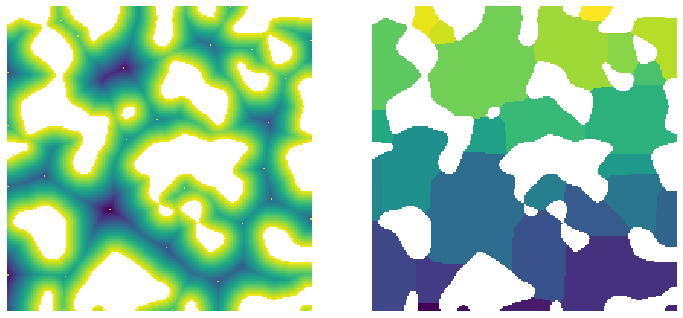

In [5]:
fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(snow.dt/im/~snow.peaks, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(snow.regions/im, origin='lower', interpolation='none')
ax[1].axis(False);

## `sigma`
Sigma controls the size of the kernel used in the gaussian blur.  This blurring REALLY helps reduce the number of false peaks that are found in the distance transform.  The default is 0.4 which was shown in the original paper to be suitable.  

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

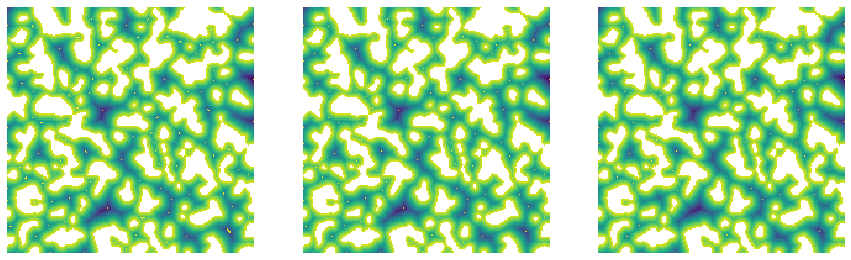

In [6]:
np.random.seed(4)
im = ps.generators.blobs(shape=[200, 200], porosity=0.7, blobiness=1.5)
snow1 = ps.filters.snow_partitioning(im, sigma=0)
snow2 = ps.filters.snow_partitioning(im, sigma=0.5)
snow3 = ps.filters.snow_partitioning(im, sigma=1.5)

fig, ax = plt.subplots(1, 3, figsize=[15, 5])
ax[0].imshow(snow1.dt/im/~snow1.peaks, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(snow2.dt/im/~snow2.peaks, origin='lower', interpolation='none')
ax[1].axis(False)
ax[2].imshow(snow3.dt/im/~snow3.peaks, origin='lower', interpolation='none')
ax[2].axis(False);

As can be seen above, a higher value of ``sigma`` results in several peaks being missed or skipped.  This may or may not be desireable.

## `r_max`
This controls the size of the neighbor used when searching for peaks in the distance transform:

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

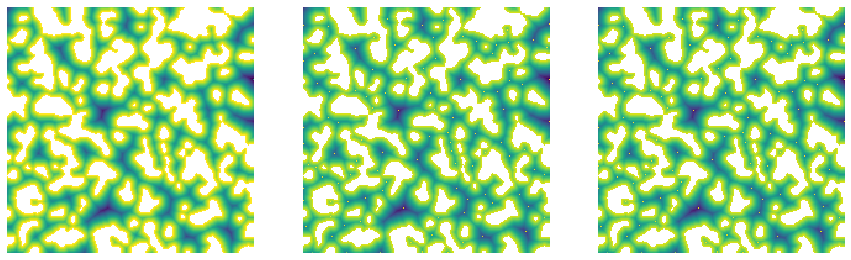

In [7]:
np.random.seed(4)
im = ps.generators.blobs(shape=[200, 200], porosity=0.7, blobiness=1.5)
snow1 = ps.filters.snow_partitioning(im, r_max=1)
snow2 = ps.filters.snow_partitioning(im, r_max=3)
snow3 = ps.filters.snow_partitioning(im, r_max=5)

fig, ax = plt.subplots(1, 3, figsize=[15, 5])
ax[0].imshow(snow1.dt/im/~snow1.peaks, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(snow2.dt/im/~snow2.peaks, origin='lower', interpolation='none')
ax[1].axis(False)
ax[2].imshow(snow3.dt/im/~snow3.peaks, origin='lower', interpolation='none')
ax[2].axis(False);